<a href="https://colab.research.google.com/github/IrfanKpm/Machine-Learning-Notes1/blob/main/_003_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 3.6 MB/s eta 0:00:00


In [3]:
import mglearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

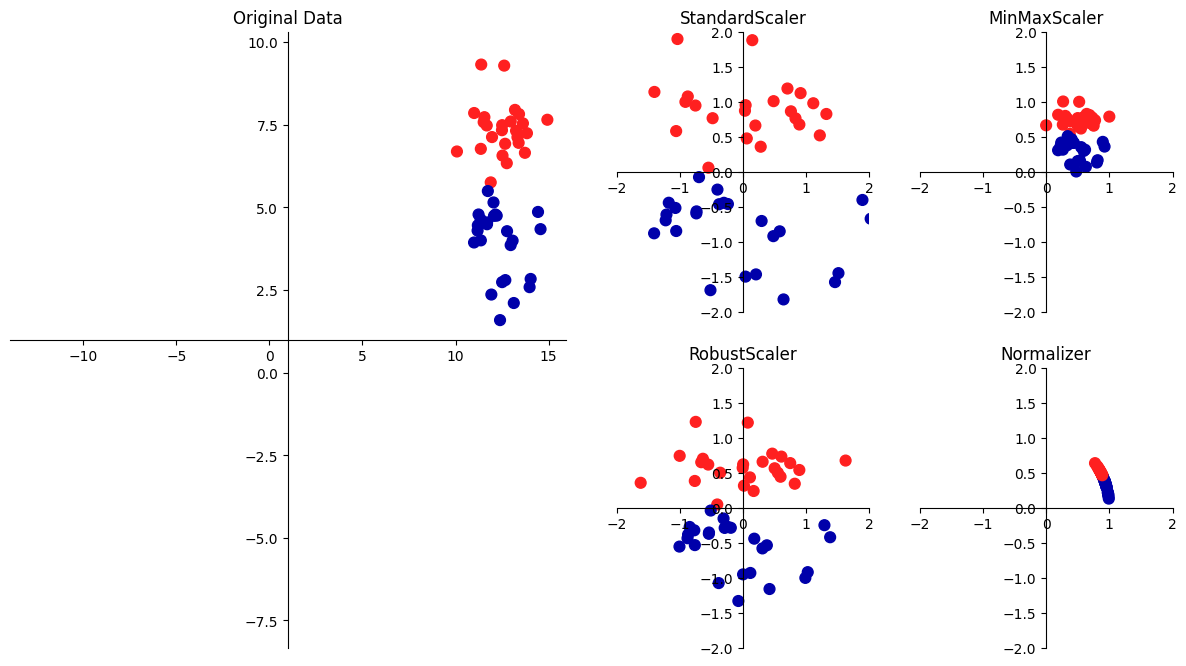

In [4]:
# This function generates a plot to illustrate how different scaling methods affect the data.
mglearn.plots.plot_scaling()

- The first feature (the x-axis value) is between 10 and 15. The second feature
(the y-axis value) is between around 1 and 9.

- The following four plots show four different ways to transform the data that yield
more standard ranges. The StandardScaler in scikit-learn ensures that for each
feature the mean is 0 and the variance is 1, bringing all features to the same magni‐
tude. However, this scaling does not ensure any particular minimum and maximum
values for the features. The RobustScaler works similarly to the StandardScaler in
that it ensures statistical properties for each feature that guarantee that they are on the
same scale. However, the RobustScaler uses the median and quartiles,1
 instead of
mean and variance. This makes the RobustScaler ignore data points that are very
different from the rest (like measurement errors). These odd data points are also
called outliers, and can lead to trouble for other scaling techniques.

- The MinMaxScaler, on the other hand, shifts the data such that all features are exactly
between 0 and 1. For the two-dimensional dataset this means all of the data is contained within the rectangle created by the x-axis between 0 and 1 and the y-axis
between 0 and 1.

- Finally, the Normalizer does a very different kind of rescaling. It scales each data
point such that the feature vector has a Euclidean length of 1. In other words, it
projects a data point on the circle (or sphere, in the case of higher dimensions) with a
radius of 1. This means every data point is scaled by a different number (by the
inverse of its length). This normalization is often used when only the direction (or
angle) of the data matters, not the length of the feature vector.

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,random_state=1)

print(X_train.shape)
print(X_test.shape)

(426, 30)
(143, 30)


In [7]:
# Assuming you want to name the columns as 'Feature_1', 'Feature_2', ..., 'Feature_30'
columns = [f'Feature_{i+1}' for i in range(X_train.shape[1])]

# Convert the NumPy array X_train into a Pandas DataFrame with column names
df = pd.DataFrame(X_train, columns=columns)

# Display the first few rows of the DataFrame
df.head()

Feature_1  Feature_2  Feature_3  Feature_4  Feature_5  Feature_6  \
0      15.22      30.62     103.40      716.9    0.10480    0.20870   
1      14.96      19.10      97.03      687.3    0.08992    0.09823   
2      14.68      20.13      94.74      684.5    0.09867    0.07200   
3      10.32      16.35      65.31      324.9    0.09434    0.04994   
4      11.85      17.46      75.54      432.7    0.08372    0.05642   

   Feature_7  Feature_8  Feature_9  Feature_10  ...  Feature_21  Feature_22  \
0    0.25500   0.094290     0.2128     0.07152  ...       17.52       42.79   
1    0.05940   0.048190     0.1879     0.05852  ...       16.25       26.19   
2    0.07395   0.052590     0.1586     0.05922  ...       19.07       30.88   
3    0.01012   0.005495     0.1885     0.06201  ...       11.25       21.77   
4    0.02688   0.022800     0.1875     0.05715  ...       13.06       25.75   

   Feature_23  Feature_24  Feature_25  Feature_26  Feature_27  Feature_28  \
0      128.70       915.0      0.1417     0.79170     1.17000     0.23560   
1      109.10       809.8      0.1313     0.30300     0.18040     0.14890   
2      123.40      1138.0      0.1464     0.18710     0.29140     0.16090   
3       71.12       384.9      0.1285     0.08842     0.04384     0.02381   
4       84.35       517.8      0.1369     0.17580     0.13160     0.09140   

   Feature_29  Feature_30  
0      0.4089     0.14090  
1      0.2962     0.08472  
2      0.3029     0.08216  
3      0.2681     0.07399  
4      0.3101     0.07007  

[5 rows x 30 columns]

In [8]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

# Transform the training data using the computed min and max values
X_train_scaled = scaler.transform(X_train)
# print dataset properties before and after scaling
print(f"transformed shape: {X_train_scaled.shape}")
print(f"per-feature minimum before scaling:\n {X_train.min(axis=0)}")
print(f"per-feature maximum before scaling:\n {X_train.max(axis=0)}")
print(f"per-feature minimum after scaling:\n {X_train_scaled.min(axis=0)}")
print(f"per-feature maximum after scaling:\n {X_train_scaled.max(axis=0)}")

transformed shape: (426, 30)
per-feature minimum before scaling:
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
per-feature maximum before scaling:
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


- The transformed data has the same shape as the original data—the features are simply
shifted and scaled. You can see that all of the features are now between 0 and 1, as
desired.
- To apply the SVM to the scaled data, we also need to transform the test set. This is
again done by calling the transform method, this time on X_test:

In [9]:
# transform test data
X_test_scaled = scaler.transform(X_test)
# print test data properties after scaling
print(f"per-feature minimum after scaling:\n{X_test_scaled.min(axis=0)}")
print(f"per-feature maximum after scaling:\n{X_test_scaled.max(axis=0)}")

per-feature minimum after scaling:
[ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
per-feature maximum after scaling:
[0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


Maybe somewhat surprisingly, you can see that for the test set, after scaling, the mini‐
mum and maximum are not 0 and 1. Some of the features are even outside the 0–1
range! The explanation is that the MinMaxScaler (and all the other scalers) always
applies exactly the same transformation to the training and the test set. This means
the transform method always subtracts the training set minimum and divides by the
training set range, which might be different from the minimum and range for the test
set.

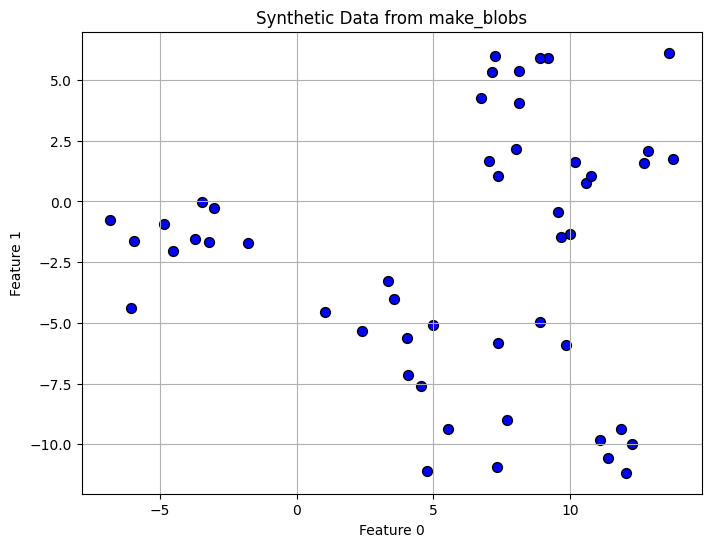

In [20]:
from sklearn.datasets import make_blobs

# Create synthetic data
X, _ = make_blobs(n_samples=50, centers=5, random_state=4, cluster_std=2)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolor='k', s=50)
plt.title("Synthetic Data from make_blobs")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.grid(True)
plt.show()

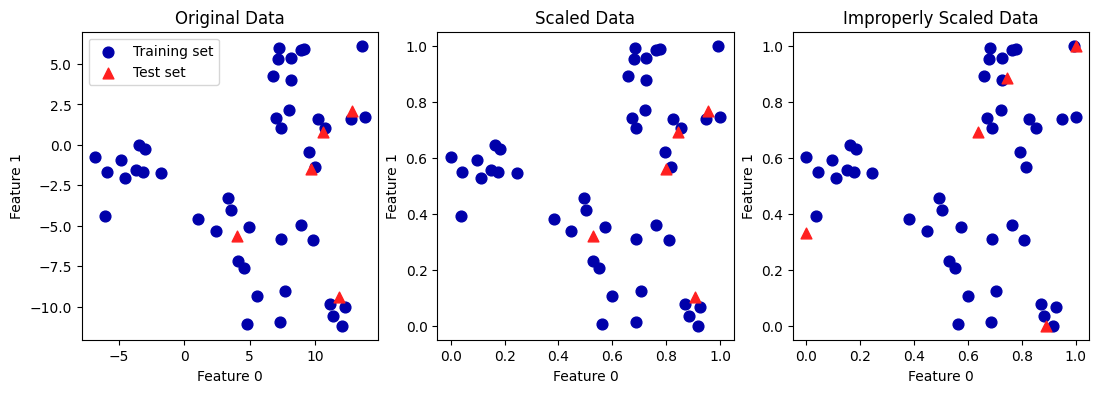

In [15]:
# Split it into training and test sets
X_train, X_test = train_test_split(X, random_state=5, test_size=0.1)

# Initialize the plot
fig, axes = plt.subplots(1, 3, figsize=(13, 4))

# Plot original data
axes[0].scatter(X_train[:, 0], X_train[:, 1],
                color=mglearn.cm2(0), label="Training set", s=60)
axes[0].scatter(X_test[:, 0], X_test[:, 1], marker='^',
                color=mglearn.cm2(1), label="Test set", s=60)
axes[0].legend(loc='upper left')
axes[0].set_title("Original Data")

# Scale the data using MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Visualize the properly scaled data
axes[1].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                color=mglearn.cm2(0), label="Training set", s=60)
axes[1].scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], marker='^',
                color=mglearn.cm2(1), label="Test set", s=60)
axes[1].set_title("Scaled Data")

# Improperly scale the test set separately
# This is for illustration only, do not use in practice
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

# Visualize wrongly scaled data
axes[2].scatter(X_train_scaled[:, 0], X_train_scaled[:, 1],
                color=mglearn.cm2(0), label="Training set", s=60)
axes[2].scatter(X_test_scaled_badly[:, 0], X_test_scaled_badly[:, 1],
                marker='^', color=mglearn.cm2(1), label="Test set", s=60)
axes[2].set_title("Improperly Scaled Data")

# Label the axes
for ax in axes:
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")

plt.show()
# Effect of scaling training and test data shown on the left together (center) and separately (right

- The first panel is an unscaled two-dimensional dataset, with the training set shown as
circles and the test set shown as triangles. The second panel is the same data, but
scaled using the MinMaxScaler. Here, we called fit on the training set, and then
called transform on the training and test sets. You can see that the dataset in the sec‐
ond panel looks identical to the first; only the ticks on the axes have changed. Now all
the features are between 0 and 1. You can also see that the minimum and maximum
feature values for the test data (the triangles) are not 0 and 1.

- The third panel shows what would happen if we scaled the training set and test set
separately. In this case, the minimum and maximum feature values for both the train‐
ing and the test set are 0 and 1. But now the dataset looks different. The test points
moved incongruously to the training set, as they were scaled differently. We changed
the arrangement of the data in an arbitrary way. Clearly this is not what we want to
do.




---

## The Effect of Preprocessing on Supervised Learning

- Now let’s go back to the cancer dataset and see the effect of using the MinMaxScaler
on learning the SVC (this is a different way of doing the same scaling we did in Chapter 2). First, let’s fit the SVC on the original data again for comparison

In [18]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,random_state=0)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.94


In [19]:
# preprocessing using zero mean and unit variance scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
# learning an SVM on the scaled training data
svm.fit(X_train_scaled, y_train)
# scoring on the scaled test set
print("SVM test accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

SVM test accuracy: 0.96


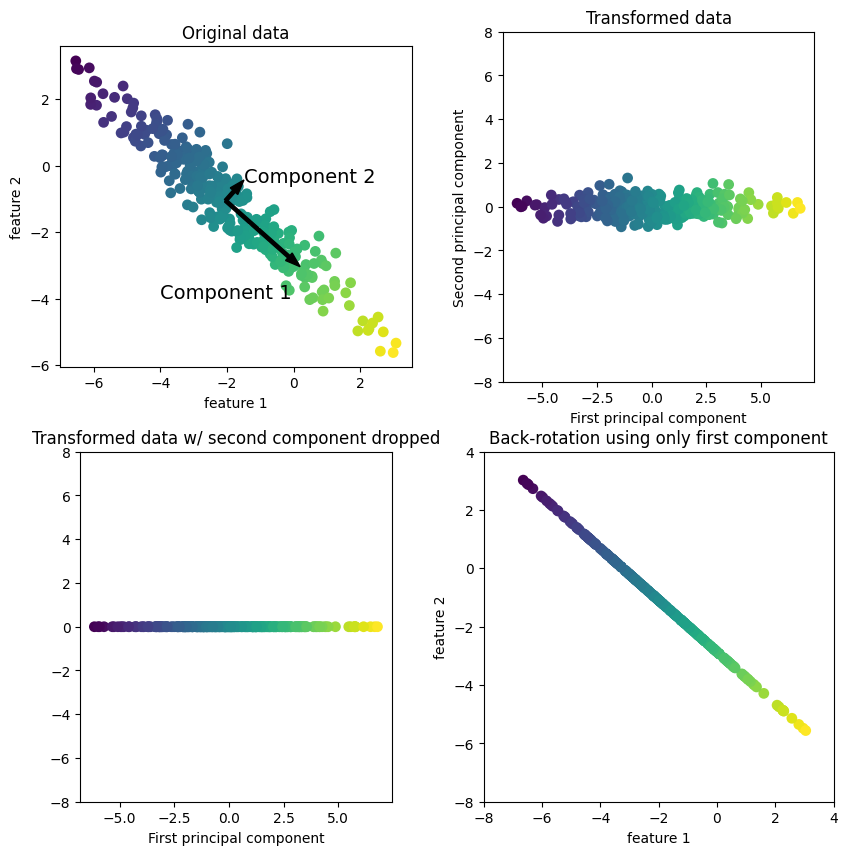

In [23]:
'''
The first plot (top left) shows the original data points, colored to distinguish among
them. The algorithm proceeds by first finding the direction of maximum variance,
labeled “Component 1.” This is the direction (or vector) in the data that contains most
of the information, or in other words, the direction along which the features are most
correlated with each other. Then, the algorithm finds the direction that contains the
most information while being orthogonal (at a right angle) to the first direction. In
two dimensions, there is only one possible orientation that is at a right angle, but in
higher-dimensional spaces there would be (infinitely) many orthogonal directions.
Although the two components are drawn as arrows, it doesn’t really matter where the
head and the tail are; we could have drawn the first component from the center up to
the top left instead of down to the bottom right. The directions found using this pro‐
cess are called principal components, as they are the main directions of variance in the
data. In general, there are as many principal components as original features.
'''

mglearn.plots.plot_pca_illustration()   # --> Figure 3-3. Transformation of data with PCA


The second plot (top right) shows the same data, but now rotated so that the first
principal component aligns with the x-axis and the second principal component
aligns with the y-axis. Before the rotation, the mean was subtracted from the data, so
that the transformed data is centered around zero. In the rotated representation
found by PCA, the two axes are uncorrelated, meaning that the correlation matrix of
the data in this representation is zero except for the diagonal.

We can use PCA for dimensionality reduction by retaining only some of the principal
components. In this example, we might keep only the first principal component, as shown in the third panel in Figure 3-3 (bottom left). This reduces the data from a
two-dimensional dataset to a one-dimensional dataset. Note, however, that instead of
keeping only one of the original features, we found the most interesting direction
(top left to bottom right in the first panel) and kept this direction, the first principal
component.

Finally, we can undo the rotation and add the mean back to the data. This will result
in the data shown in the last panel in Figure 3-3. These points are in the original fea‐
ture space, but we kept only the information contained in the first principal compo‐
nent. This transformation is sometimes used to remove noise effects from the data or
visualize what part of the information is retained using the principal components.




---

## Applying PCA to the cancer dataset for visualization

One of the most common applications of PCA is visualizing high-dimensional data‐
sets. As we saw in Chapter 1, it is hard to create scatter plots of data that has more
than two features. For the Iris dataset, we were able to create a pair plot (Figure 1-3 in
Chapter 1) that gave us a partial picture of the data by showing us all the possible
combinations of two features. But if we want to look at the Breast Cancer dataset,
even using a pair plot is tricky. This dataset has 30 features, which would result in
30 * 14 = 420 scatter plots! We’d never be able to look at all these plots in detail, let
alone try to understand them.

There is an even simpler visualization we can use, though—computing histograms of
each of the features for the two classes, benign and malignant cancer (Figure 3-4):


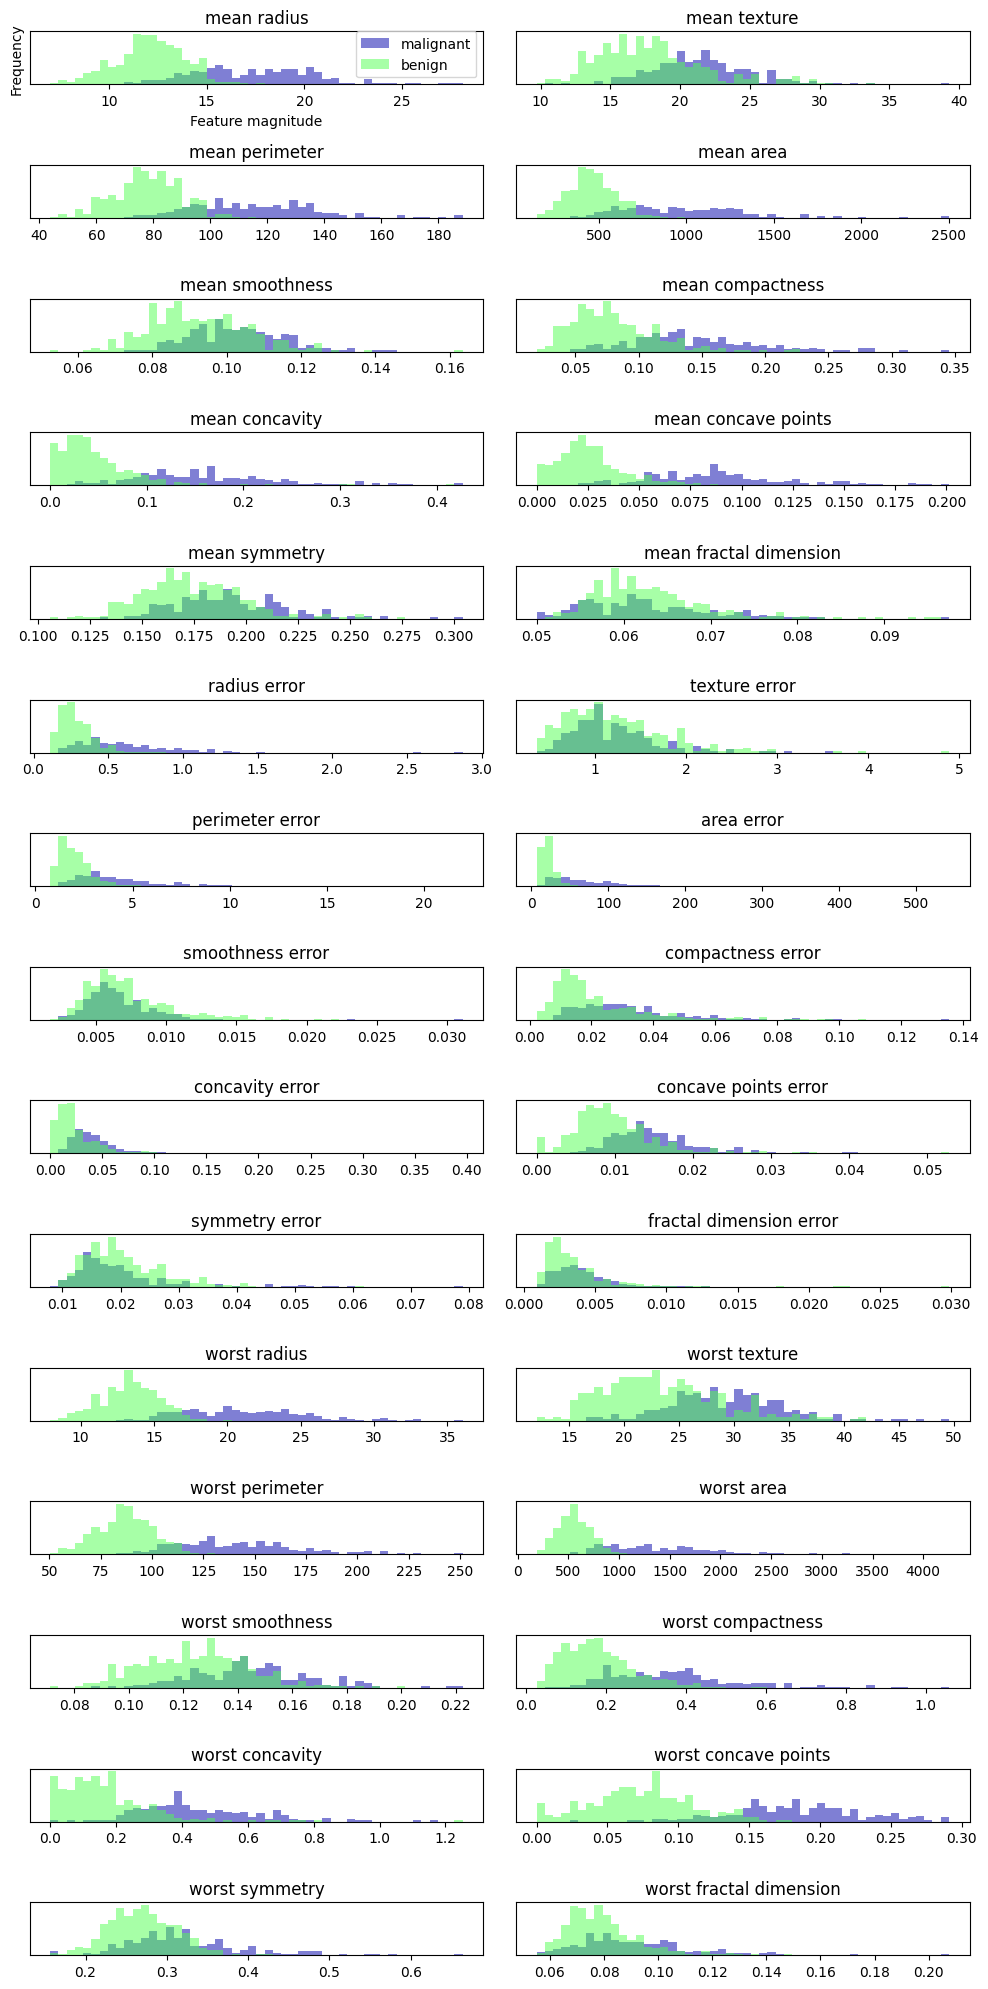

In [24]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = cancer.data[cancer.target == 0]
benign = cancer.data[cancer.target == 1]
ax = axes.ravel()
for i in range(30):
 _, bins = np.histogram(cancer.data[:, i], bins=50)
 ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
 ax[i].hist(benign[:, i], bins=bins, color=mglearn.cm3(2), alpha=.5)
 ax[i].set_title(cancer.feature_names[i])
 ax[i].set_yticks(())
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel("Frequency")
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()


In [25]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled = scaler.transform(cancer.data)

In [26]:
from sklearn.decomposition import PCA
# keep the first two principal components of the data
pca = PCA(n_components=2)
# fit PCA model to breast cancer data
pca.fit(X_scaled)
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(X_scaled.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))


Original shape: (569, 30)
Reduced shape: (569, 2)


Text(0, 0.5, 'Second principal component')

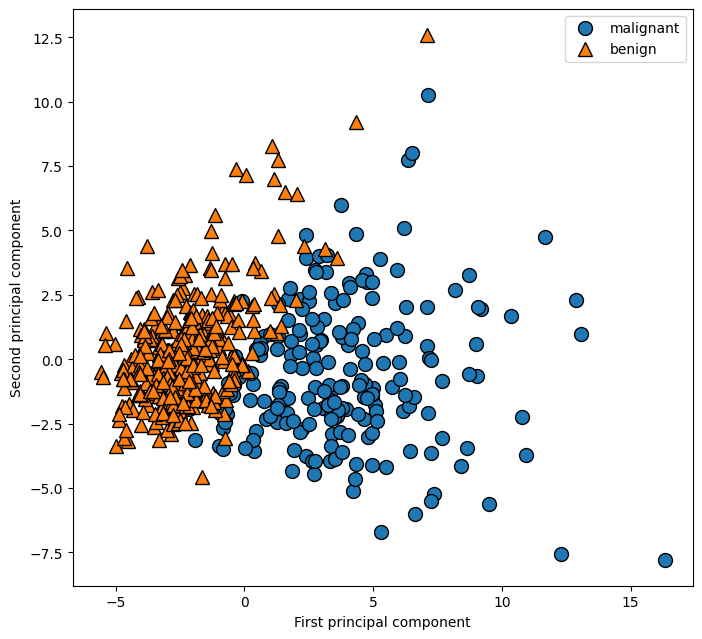

In [28]:
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

#Two-dimensional scatter plot of the Breast Cancer dataset using the first two principal components

In [29]:
print("PCA component shape: {}".format(pca.components_.shape))

PCA component shape: (2, 30)


In [30]:
print("PCA components:\n{}".format(pca.components_))

PCA components:
[[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


Text(0, 0.5, 'Principal components')

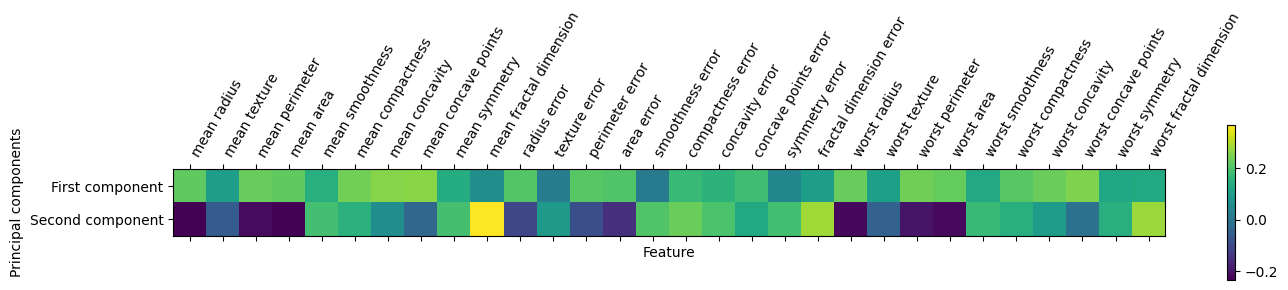

In [32]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(cancer.feature_names)),cancer.feature_names, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")

## Eigenfaces for feature extraction

- Another application of PCA that we mentioned earlier is feature extraction. The idea
behind feature extraction is that it is possible to find a representation of your data
that is better suited to analysis than the raw representation you were given. A great
example of an application where feature extraction is helpful is with images. Images
are made up of pixels, usually stored as red, green, and blue (RGB) intensities.
Objects in images are usually made up of thousands of pixels, and only together are
they meaningful.

- We will give a very simple application of feature extraction on images using PCA, by
working with face images from the Labeled Faces in the Wild dataset. This dataset
contains face images of celebrities downloaded from the Internet, and it includes
faces of politicians, singers, actors, and athletes from the early 2000s. We use gray‐
scale versions of these images, and scale them down for faster processing. You can see
some of the images in Figure 3-7:

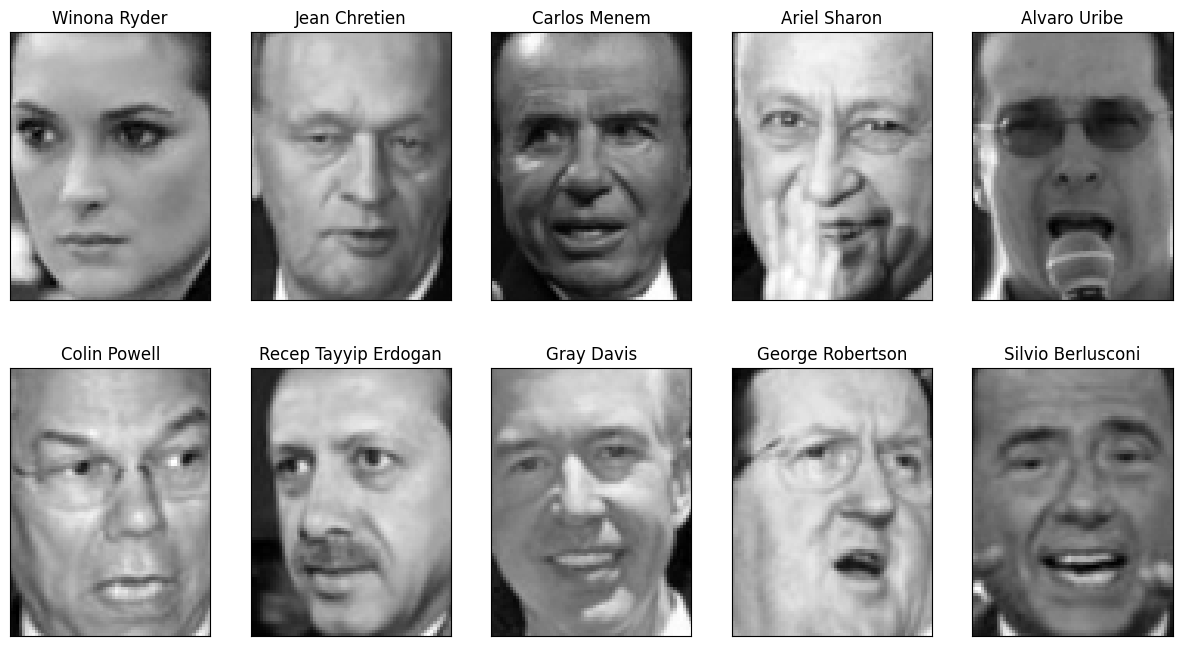

In [34]:
from sklearn.datasets import fetch_lfw_people
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8),subplot_kw={'xticks': (), 'yticks': ()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
   ax.imshow(image,cmap='gray')
   ax.set_title(people.target_names[target])

In [35]:
print("people.images.shape: {}".format(people.images.shape))
print("Number of classes: {}".format(len(people.target_names)))

people.images.shape: (3023, 87, 65)
Number of classes: 62


In [37]:
# Count how often each target appears
counts = np.bincount(people.target)

# Print counts next to target names
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end=' ')
    if (i + 1) % 3 == 0:
        print()  # Move to the next line after every third item

Alejandro Toledo           39 Alvaro Uribe               35 Amelie Mauresmo            21 
Andre Agassi               36 Angelina Jolie             20 Ariel Sharon               77 
Arnold Schwarzenegger      42 Atal Bihari Vajpayee       24 Bill Clinton               29 
Carlos Menem               21 Colin Powell              236 David Beckham              31 
Donald Rumsfeld           121 George Robertson           22 George W Bush             530 
Gerhard Schroeder         109 Gloria Macapagal Arroyo    44 Gray Davis                 26 
Guillermo Coria            30 Hamid Karzai               22 Hans Blix                  39 
Hugo Chavez                71 Igor Ivanov                20 Jack Straw                 28 
Jacques Chirac             52 Jean Chretien              55 Jennifer Aniston           21 
Jennifer Capriati          42 Jennifer Lopez             21 Jeremy Greenstock          24 
Jiang Zemin                20 John Ashcroft              53 John Negroponte            31 

In [39]:
# Create a mask to select up to 50 samples per target class
mask = np.zeros(people.target.shape, dtype=bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] = True

# Apply the mask to the data and target arrays
X_people = people.data[mask]
y_people = people.target[mask]

# Scale the grayscale values to be between 0 and 1 for better numeric stability
X_people = X_people / 255.0


A common task in face recognition is to ask if a previously unseen face belongs to a
known person from a database. This has applications in photo collection, social
media, and security applications. One way to solve this problem would be to build a
classifier where each person is a separate class. However, there are usually many different people in face databases, and very few images of the same person (i.e., very few
training examples per class). That makes it hard to train most classifiers. Additionally you often want to be able to add new people easily, without needing to retrain a large
model.

A simple solution is to use a one-nearest-neighbor classifier that looks for the most
similar face image to the face you are classifying. This classifier could in principle
work with only a single training example per class. Let’s take a look at how well
KNeighborsClassifier does here:

In [40]:
from sklearn.neighbors import KNeighborsClassifier
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
 X_people, y_people, stratify=y_people, random_state=0)
# build a KNeighborsClassifier using one neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test, y_test)))

Test set score of 1-nn: 0.22


This is where PCA comes in. Computing distances in the original pixel space is quite
a bad way to measure similarity between faces. When using a pixel representation to
compare two images, we compare the grayscale value of each individual pixel to the
value of the pixel in the corresponding position in the other image. This representa‐
tion is quite different from how humans would interpret the image of a face, and it is
hard to capture the facial features using this raw representation. For example, using
pixel distances means that shifting a face by one pixel to the right corresponds to a
drastic change, with a completely different representation. We hope that using distan‐
ces along principal components can improve our accuracy. Here, we enable the
whitening option of PCA, which rescales the principal components to have the same
scale. This is the same as using StandardScaler after the transformation. Reusing the
data from Figure 3-3 again, whitening corresponds to not only rotating the data, but
also rescaling it so that the center panel is a circle instead of an ellipse (see
Figure 3-8):


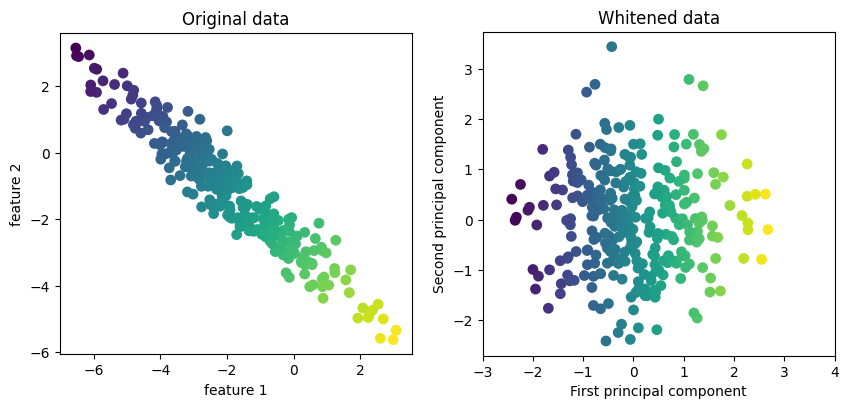

In [41]:
mglearn.plots.plot_pca_whitening()

In [42]:
pca = PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("X_train_pca.shape: {}".format(X_train_pca.shape))

X_train_pca.shape: (1547, 100)


In [43]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca, y_train)
print("Test set accuracy: {:.2f}".format(knn.score(X_test_pca, y_test)))

Test set accuracy: 0.30


In [44]:
print("pca.components_.shape: {}".format(pca.components_.shape))

pca.components_.shape: (100, 5655)


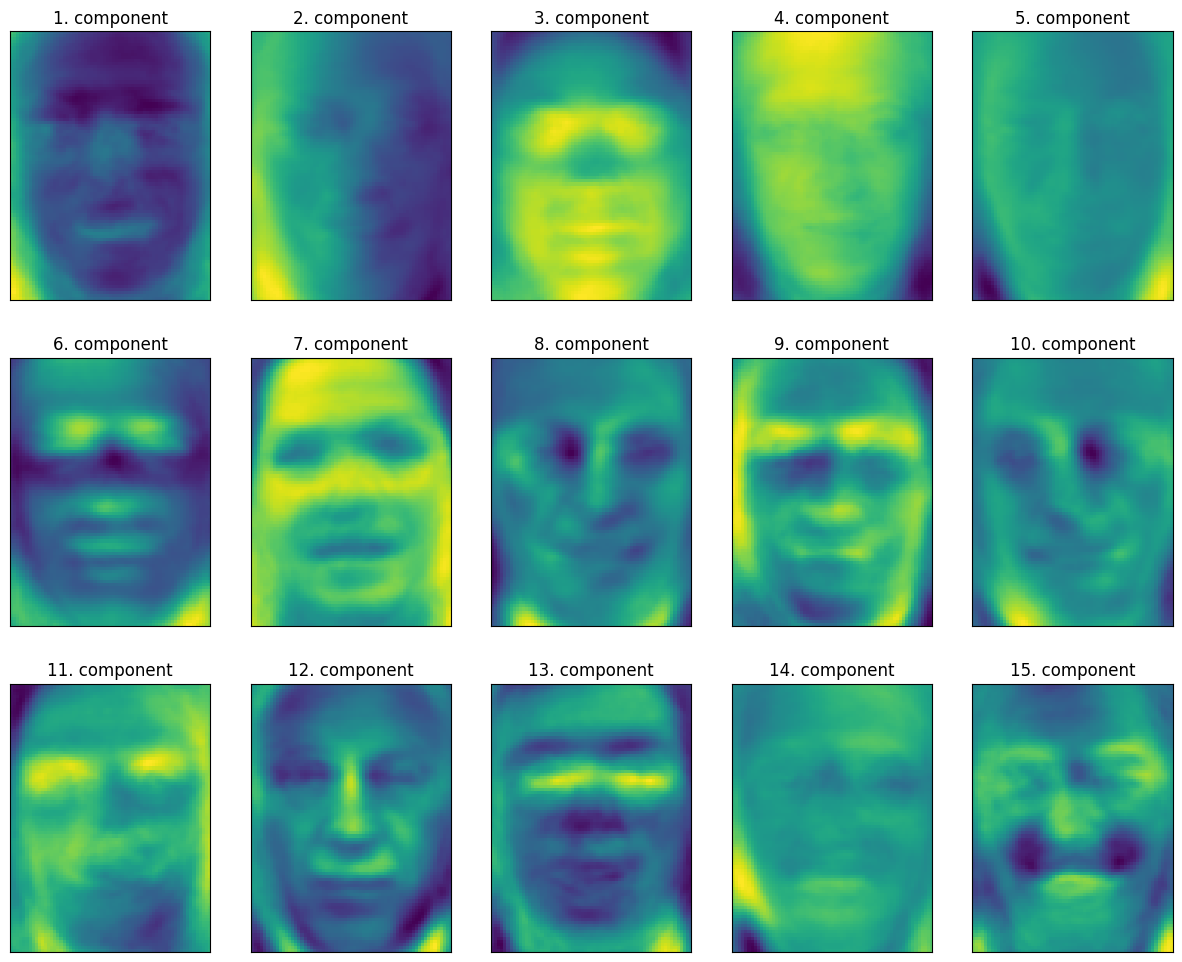

In [45]:
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
 subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(pca.components_, axes.ravel())):
 ax.imshow(component.reshape(image_shape),
 cmap='viridis')
 ax.set_title("{}. component".format((i + 1)))

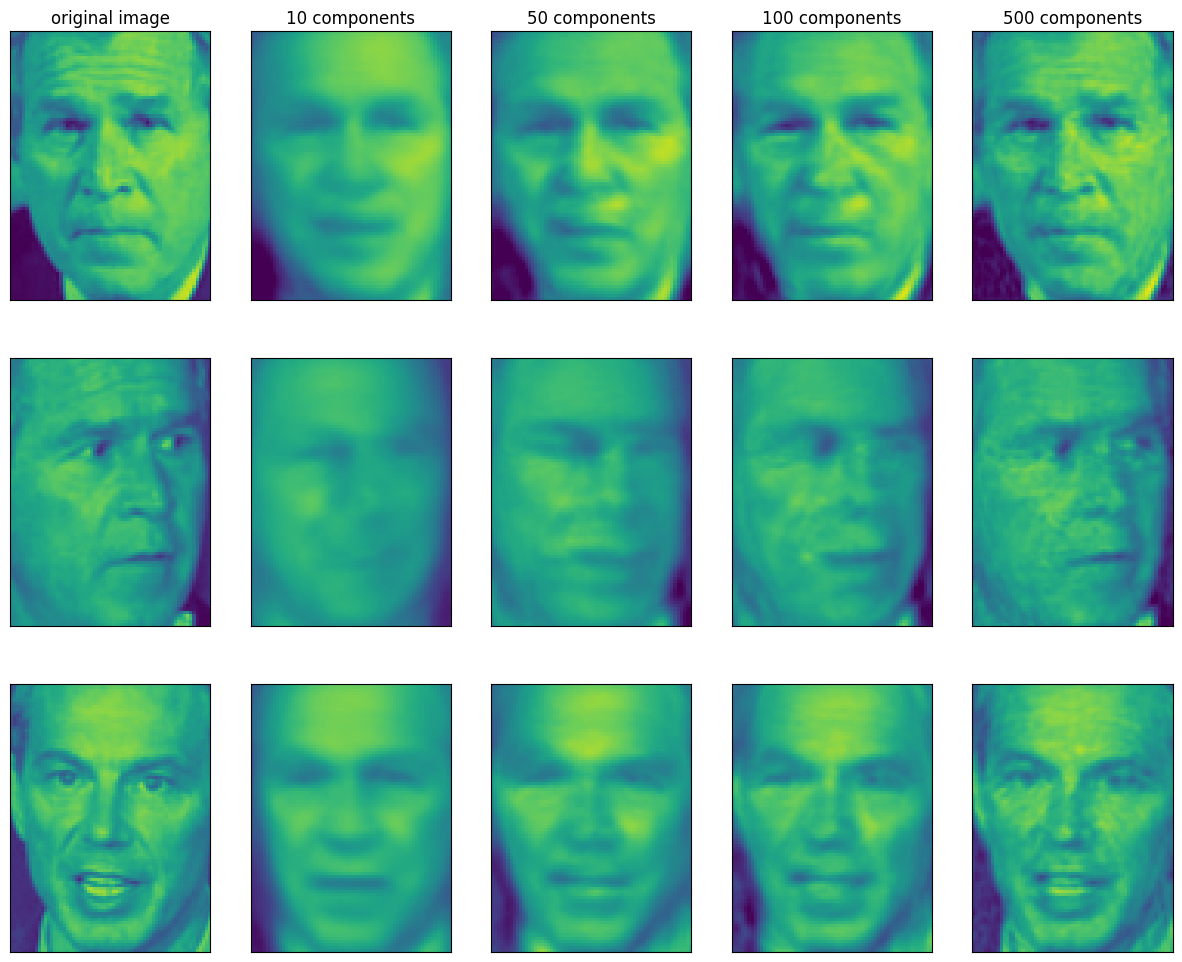

In [55]:
# Make sure to use the correct image shape
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape=image_shape)

Text(0, 0.5, 'Second principal component')

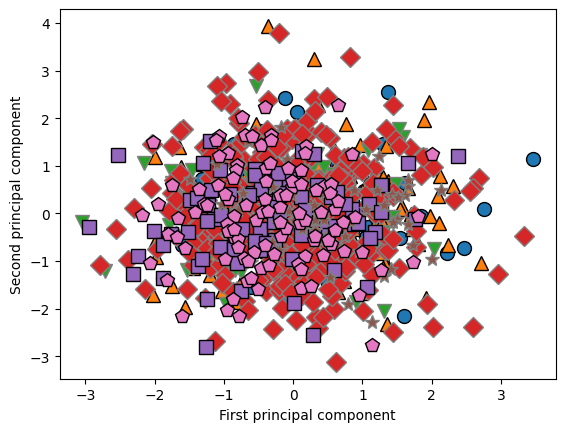

In [56]:
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


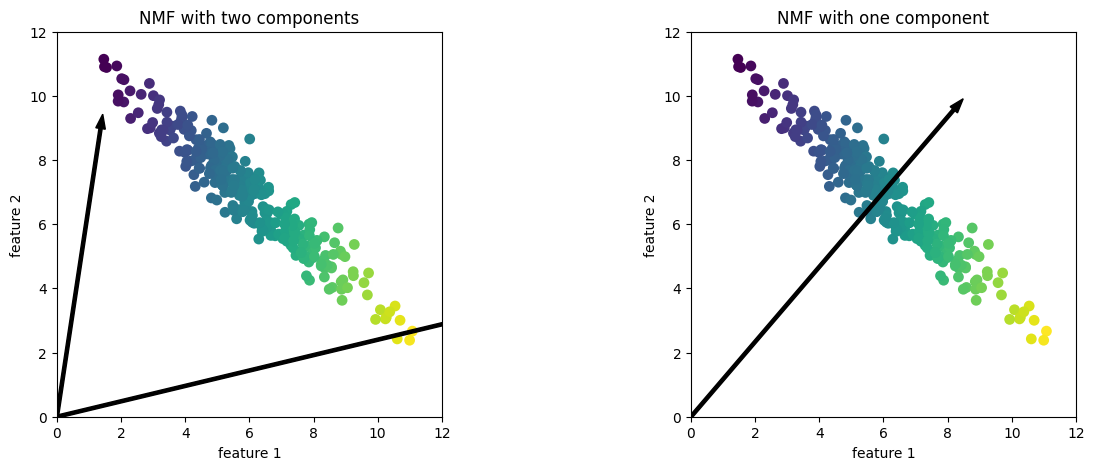

In [57]:
mglearn.plots.plot_nmf_illustration()

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


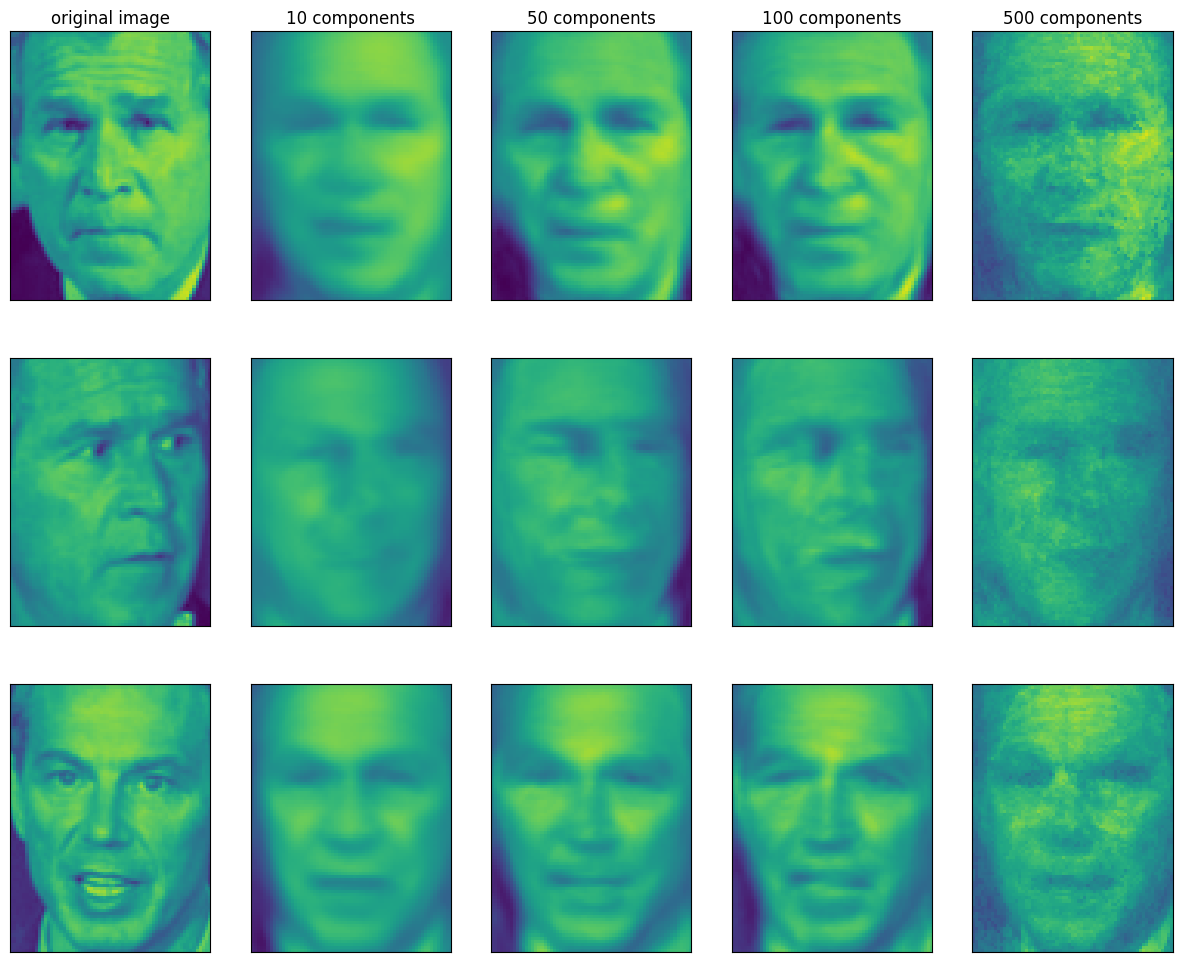

In [58]:
mglearn.plots.plot_nmf_faces(X_train, X_test, image_shape)

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


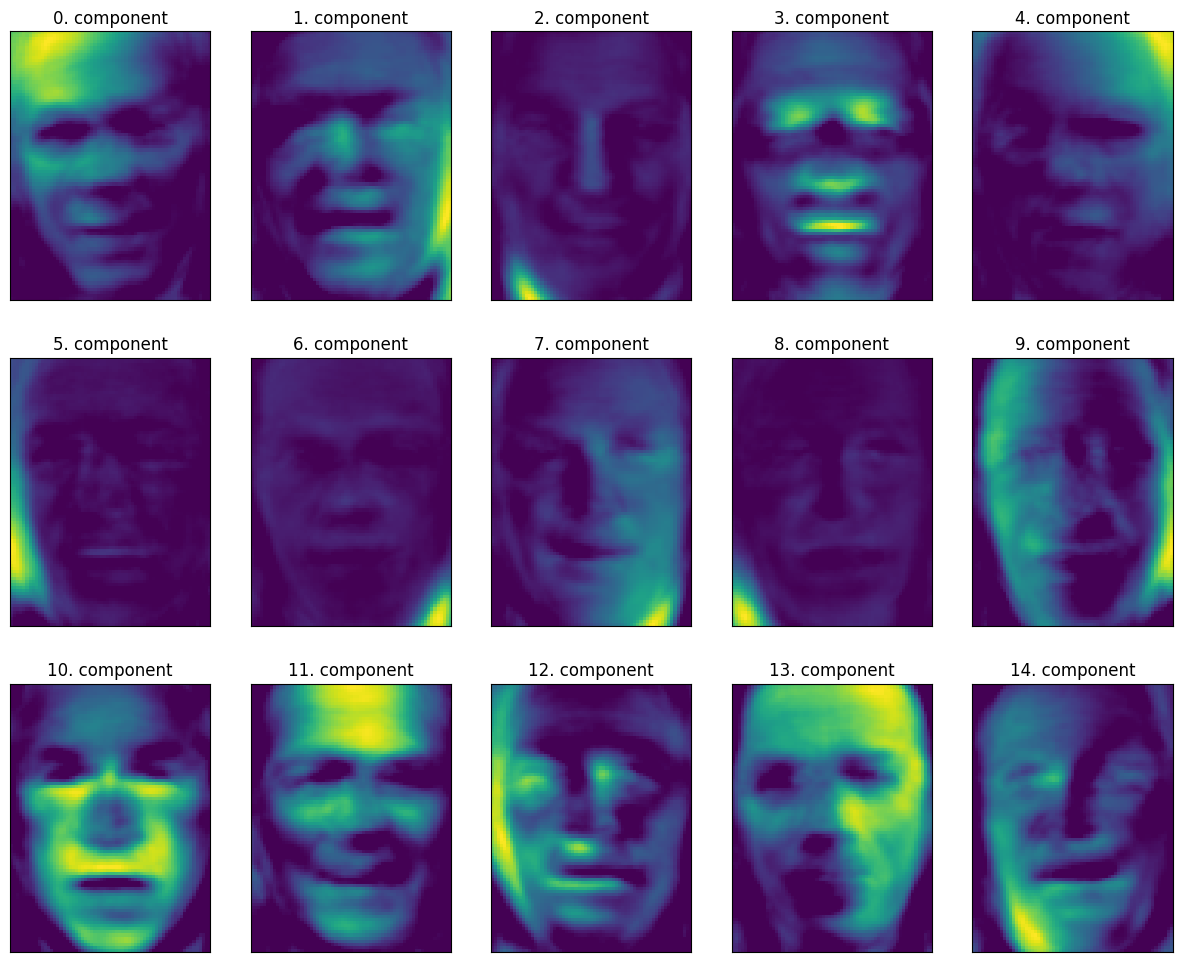

In [60]:
from sklearn.decomposition import NMF
nmf = NMF(n_components=15, random_state=0)
nmf.fit(X_train)
X_train_nmf = nmf.transform(X_train)
X_test_nmf = nmf.transform(X_test)
fix, axes = plt.subplots(3, 5, figsize=(15, 12),
 subplot_kw={'xticks': (), 'yticks': ()})
for i, (component, ax) in enumerate(zip(nmf.components_, axes.ravel())):
   ax.imshow(component.reshape(image_shape))
   ax.set_title("{}. component".format(i))


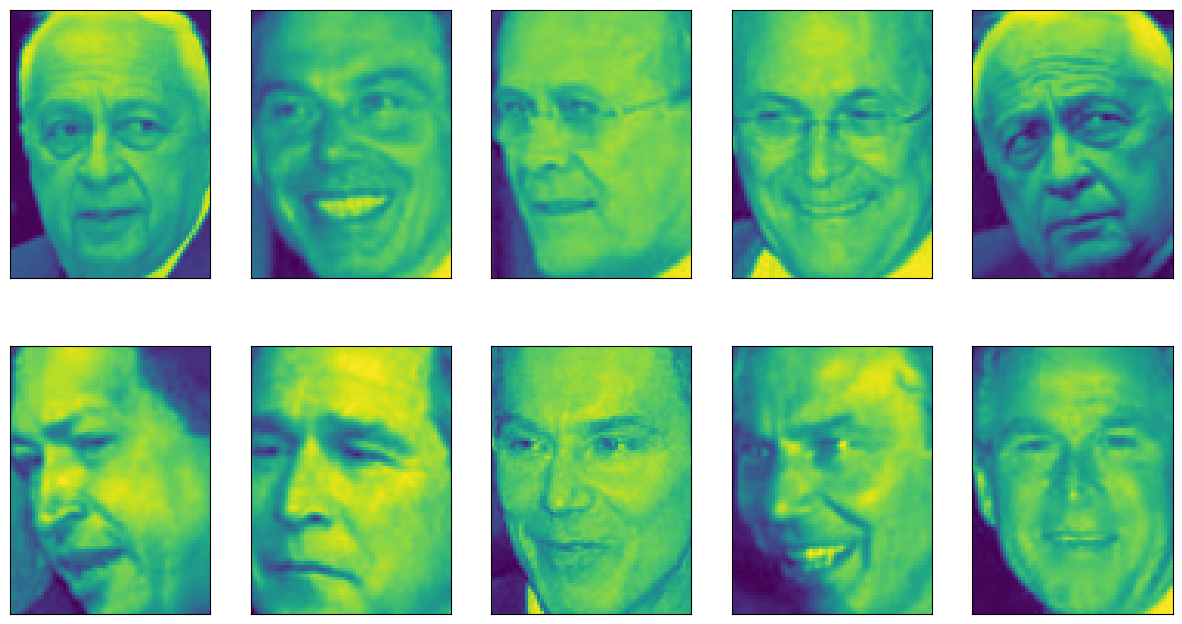

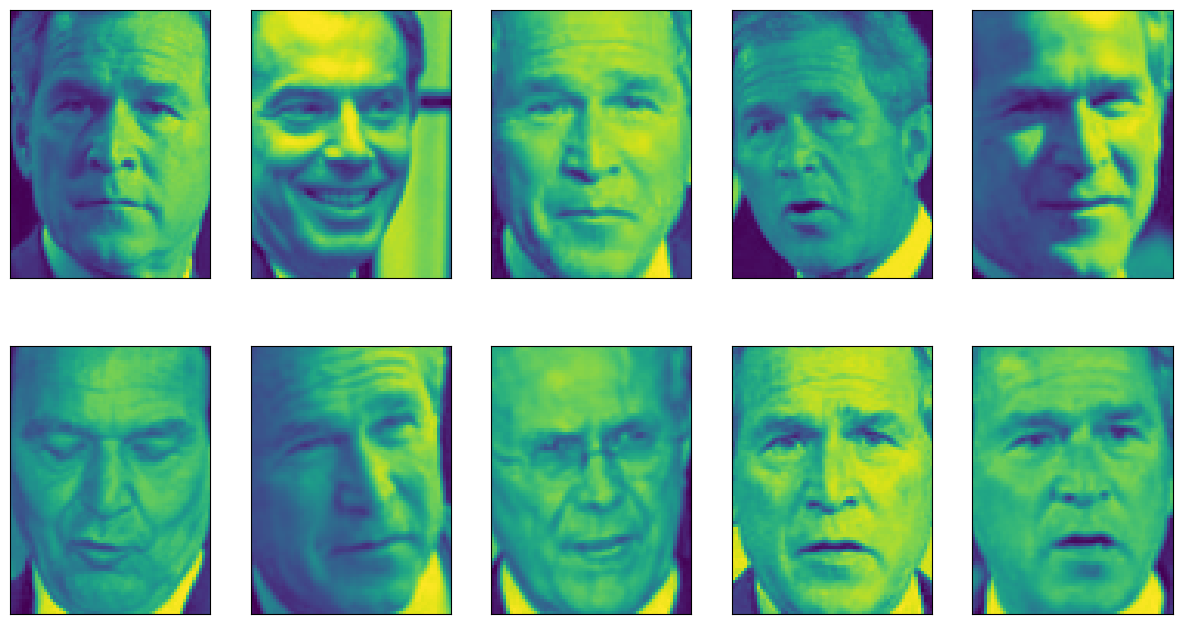

In [61]:
compn = 3
# sort by 3rd component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
 subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
 ax.imshow(X_train[ind].reshape(image_shape))
compn = 7
# sort by 7th component, plot first 10 images
inds = np.argsort(X_train_nmf[:, compn])[::-1]
fig, axes = plt.subplots(2, 5, figsize=(15, 8),
 subplot_kw={'xticks': (), 'yticks': ()})
for i, (ind, ax) in enumerate(zip(inds, axes.ravel())):
   ax.imshow(X_train[ind].reshape(image_shape))


Text(0, 0.5, 'Signal')

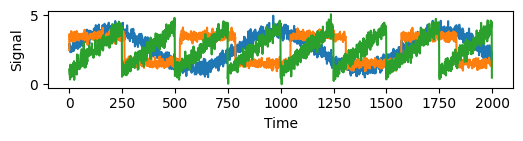

In [62]:
S = mglearn.datasets.make_signals()
plt.figure(figsize=(6, 1))
plt.plot(S, '-')
plt.xlabel("Time")
plt.ylabel("Signal")

In [63]:
# mix data into a 100-dimensional state
A = np.random.RandomState(0).uniform(size=(100, 3))
X = np.dot(S, A.T)
print("Shape of measurements: {}".format(X.shape))

Shape of measurements: (2000, 100)


In [64]:
nmf = NMF(n_components=3, random_state=42)
S_ = nmf.fit_transform(X)
print("Recovered signal shape: {}".format(S_.shape))

Recovered signal shape: (2000, 3)


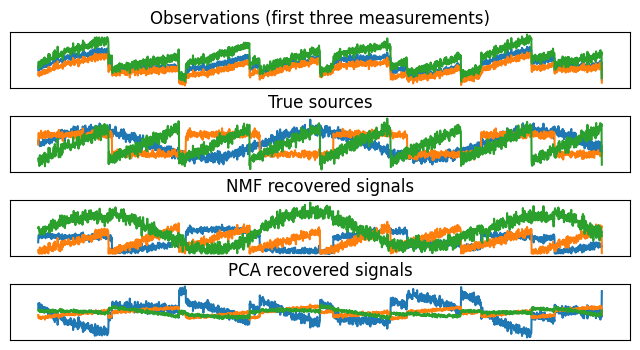

In [66]:
pca = PCA(n_components=3)
H = pca.fit_transform(X)

models = [X, S, S_, H]
names = ['Observations (first three measurements)',
 'True sources',
 'NMF recovered signals',
 'PCA recovered signals']
fig, axes = plt.subplots(4, figsize=(8, 4), gridspec_kw={'hspace': .5},
 subplot_kw={'xticks': (), 'yticks': ()})
for model, name, ax in zip(models, names, axes):
 ax.set_title(name)
 ax.plot(model[:, :3], '-')


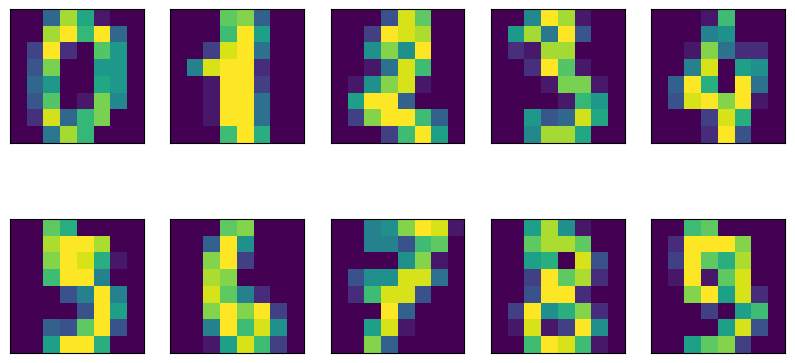

In [67]:
from sklearn.datasets import load_digits
digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5),
 subplot_kw={'xticks':(), 'yticks': ()})
for ax, img in zip(axes.ravel(), digits.images):
 ax.imshow(img)


In [70]:
len(digits.images)

1797

Text(0, 0.5, 'Second principal component')

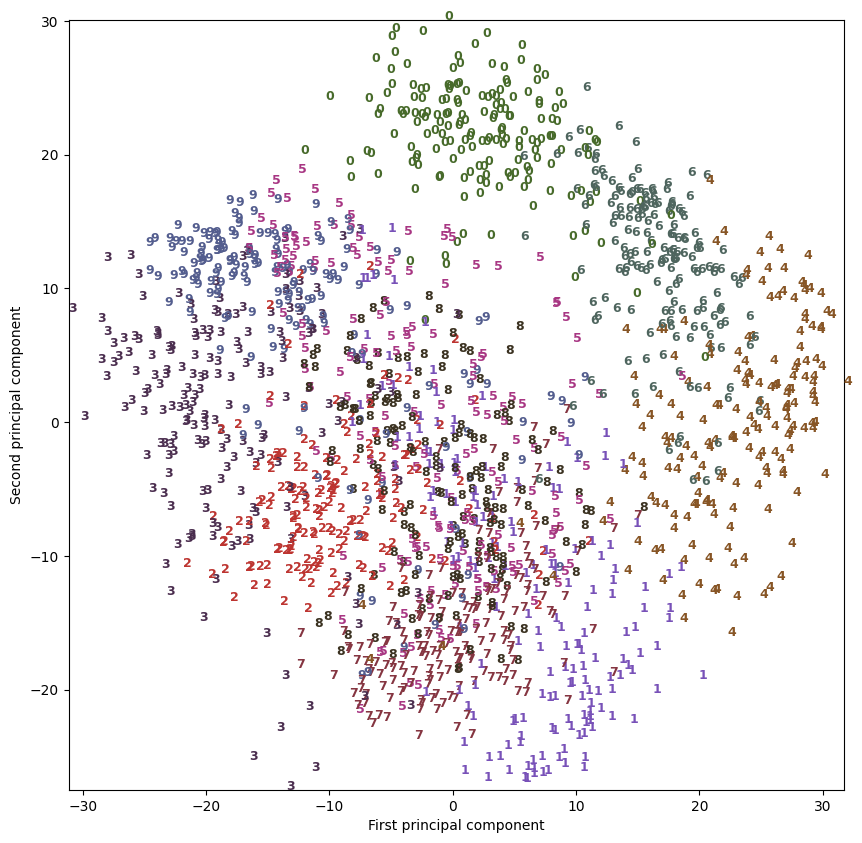

In [71]:
# build a PCA model
pca = PCA(n_components=2)
pca.fit(digits.data)
# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
 "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
 # actually plot the digits as text instead of using scatter
 plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
 color = colors[digits.target[i]],
 fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")


Text(0.5, 0, 't-SNE feature 1')

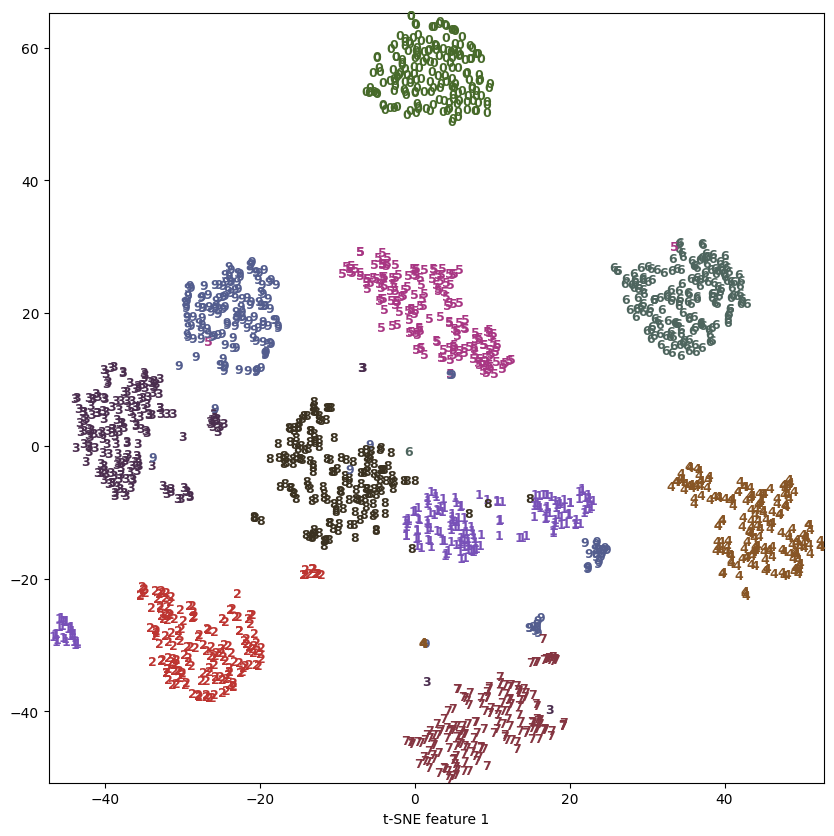

In [72]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne.fit_transform(digits.data)
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
    color = colors[digits.target[i]],
    fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.xlabel("t-SNE feature 1")


## Clustering
As we described earlier, clustering is the task of partitioning the dataset into groups,
called clusters. The goal is to split up the data in such a way that points within a single
cluster are very similar and points in different clusters are different. Similarly to clas‐
sification algorithms, clustering algorithms assign (or predict) a number to each data
point, indicating which cluster a particular point belongs to

## k-Means Clustering
k-means clustering is one of the simplest and most commonly used clustering algo‐
rithms. It tries to find cluster centers that are representative of certain regions of the
data. The algorithm alternates between two steps: assigning each data point to the
closest cluster center, and then setting each cluster center as the mean of the data
points that are assigned to it. The algorithm is finished when the assignment of
instances to clusters no longer changes. The following example (Figure 3-23) illus‐
trates the algorithm on a synthetic dataset:


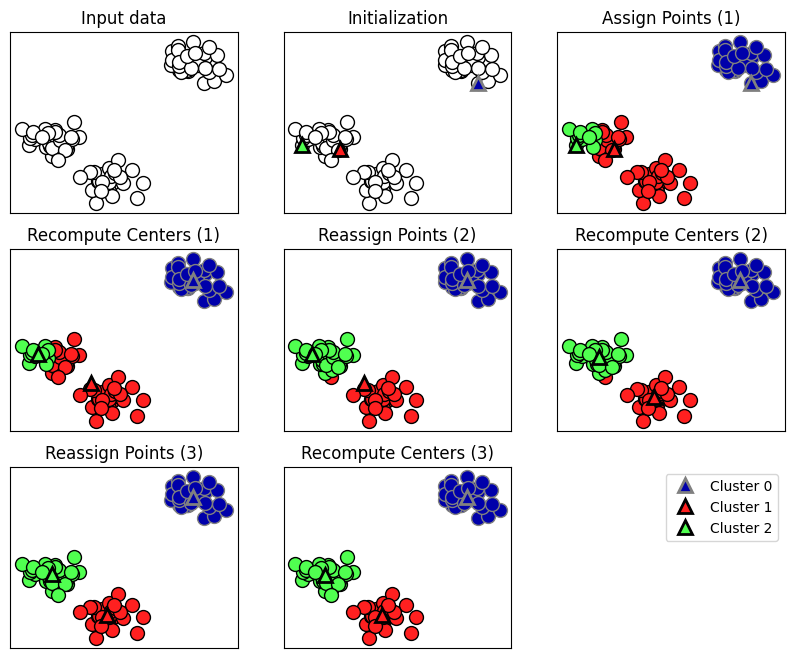

In [73]:
mglearn.plots.plot_kmeans_algorithm()

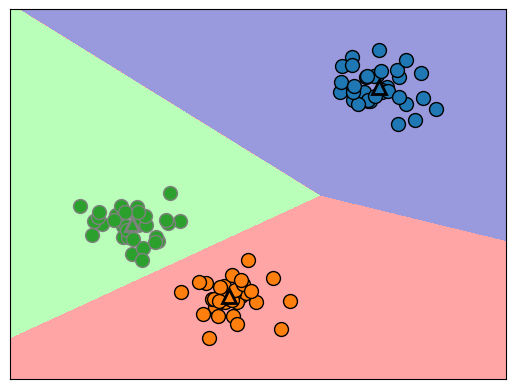

In [74]:
mglearn.plots.plot_kmeans_boundaries()

In [76]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# generate synthetic two-dimensional data
X, y = make_blobs(random_state=1)
# build the clustering model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [77]:
print(kmeans.predict(X))

[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


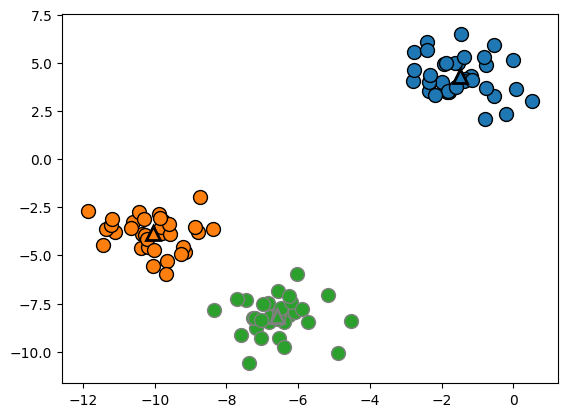

In [79]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], [0, 1, 2],markers='^', markeredgewidth=2)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


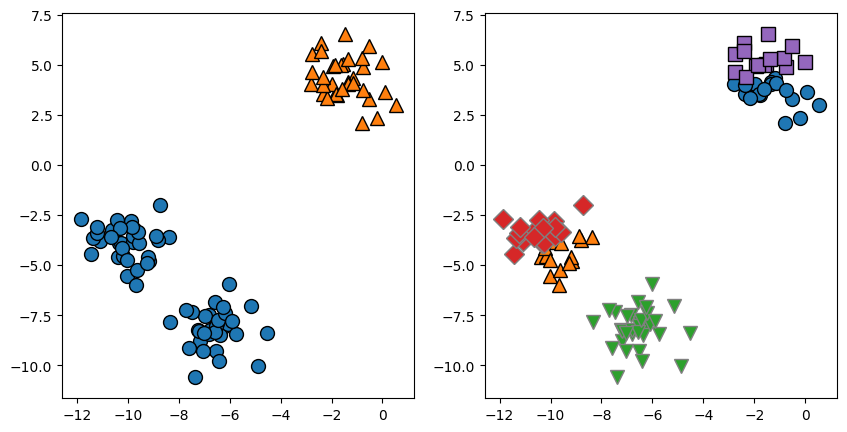

In [81]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
# using two cluster centers:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])
# using five cluster centers:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'Feature 1')

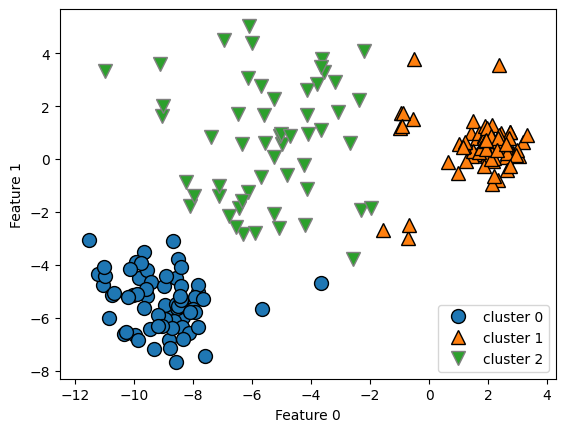

In [82]:
X_varied, y_varied = make_blobs(n_samples=200,
 cluster_std=[1.0, 2.5, 0.5],
 random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'Feature 1')

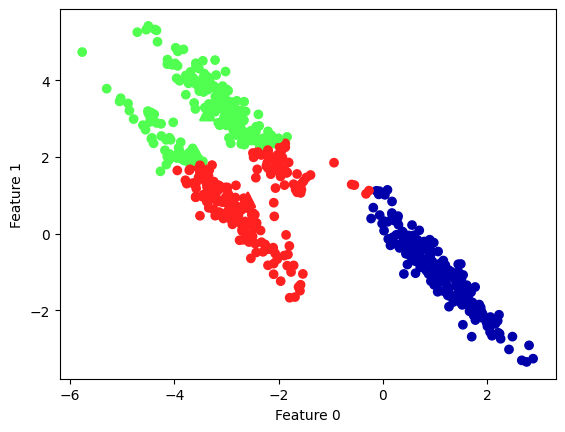

In [83]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)
# cluster the data into three clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)
# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
 marker='^', c=[0, 1, 2], s=100, linewidth=2, cmap=mglearn.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


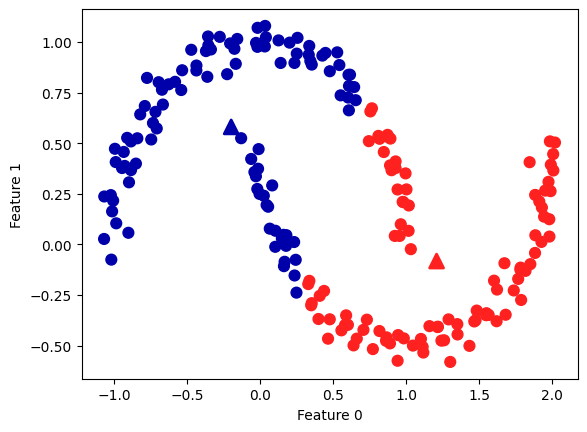

In [85]:
# generate synthetic two_moons data (with less noise this time)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# cluster the data into two clusters
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
 marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)
nmf = NMF(n_components=100, random_state=0)
nmf.fit(X_train)
pca = PCA(n_components=100, random_state=0)
pca.fit(X_train)
kmeans = KMeans(n_clusters=100, random_state=0)
kmeans.fit(X_train)
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test))
X_reconstructed_kmeans = kmeans.cluster_centers_[kmeans.predict(X_test)]
X_reconstructed_nmf = np.dot(nmf.transform(X_test), nmf.components_)


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0, 0.5, 'nmf')

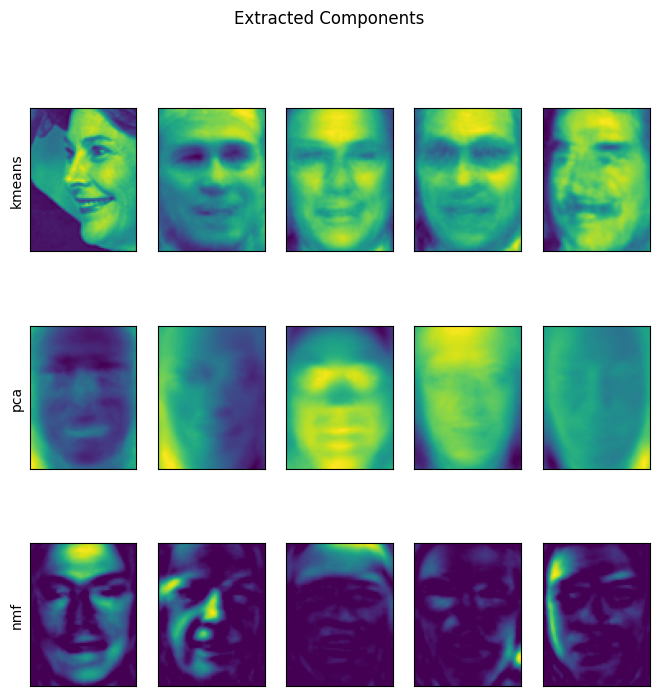

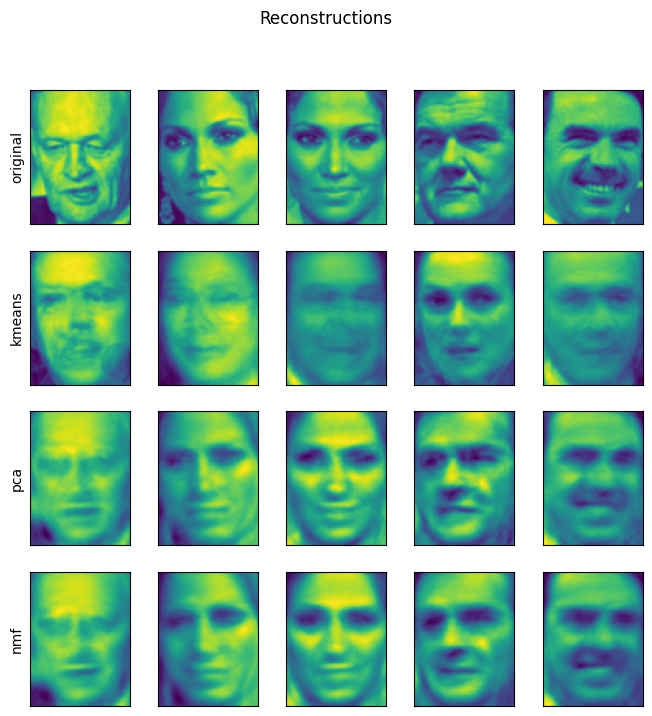

In [87]:
fig, axes = plt.subplots(3, 5, figsize=(8, 8),
 subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("Extracted Components")
for ax, comp_kmeans, comp_pca, comp_nmf in zip(
 axes.T, kmeans.cluster_centers_, pca.components_, nmf.components_):
 ax[0].imshow(comp_kmeans.reshape(image_shape))
 ax[1].imshow(comp_pca.reshape(image_shape), cmap='viridis')
 ax[2].imshow(comp_nmf.reshape(image_shape))
axes[0, 0].set_ylabel("kmeans")
axes[1, 0].set_ylabel("pca")
axes[2, 0].set_ylabel("nmf")
fig, axes = plt.subplots(4, 5, subplot_kw={'xticks': (), 'yticks': ()},figsize=(8, 8))
fig.suptitle("Reconstructions")
for ax, orig, rec_kmeans, rec_pca, rec_nmf in zip(
 axes.T, X_test, X_reconstructed_kmeans, X_reconstructed_pca,
 X_reconstructed_nmf):
 ax[0].imshow(orig.reshape(image_shape))
 ax[1].imshow(rec_kmeans.reshape(image_shape))
 ax[2].imshow(rec_pca.reshape(image_shape))
 ax[3].imshow(rec_nmf.reshape(image_shape))
axes[0, 0].set_ylabel("original")
axes[1, 0].set_ylabel("kmeans")
axes[2, 0].set_ylabel("pca")
axes[3, 0].set_ylabel("nmf")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster memberships:
[0 9 4 1 9 5 0 2 0 2 3 6 9 2 8 0 7 6 7 8 5 2 7 2 3 4 9 5 4 7 0 3 2 4 0 5 6
 0 8 4 6 3 7 4 9 3 0 8 4 2 8 6 5 1 2 0 7 2 7 3 6 1 9 0 2 1 3 9 3 1 6 1 6 4
 2 1 4 0 7 6 5 3 6 5 4 3 0 3 6 5 7 0 5 8 5 9 9 6 1 4 2 5 3 0 1 4 1 3 9 7 8
 3 3 1 0 9 7 5 6 0 0 8 4 3 4 8 0 4 2 5 0 8 1 6 2 9 2 1 5 0 4 4 7 3 3 0 4 2
 7 4 6 9 0 7 6 3 2 6 7 7 4 2 7 9 6 9 7 6 9 2 7 1 1 8 4 2 5 8 8 7 9 1 5 9 5
 7 3 2 1 8 1 7 0 0 4 8 5 4 3 9]


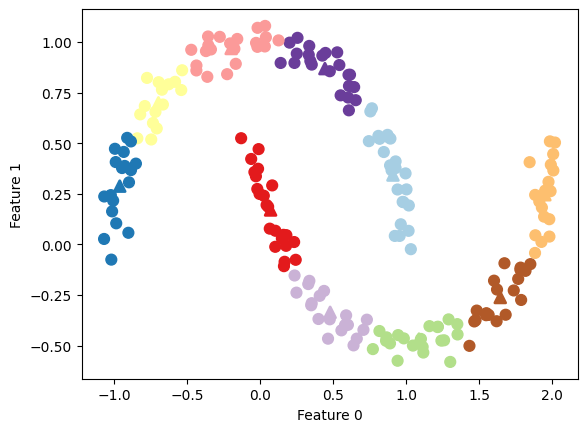

In [88]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
kmeans = KMeans(n_clusters=10, random_state=0)
kmeans.fit(X)
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=60, cmap='Paired')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=60,
 marker='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
print("Cluster memberships:\n{}".format(y_pred))

In [89]:
distance_features = kmeans.transform(X)
print("Distance feature shape: {}".format(distance_features.shape))
print("Distance features:\n{}".format(distance_features))

Distance feature shape: (200, 10)
Distance features:
[[0.20114577 1.79608327 1.02576102 ... 0.51057099 1.52608012 1.13956805]
 [1.0130603  2.66745979 0.53925926 ... 1.71532972 2.55646013 0.1199124 ]
 [0.9321221  0.94281523 1.3332387  ... 0.75390788 0.80023234 1.74914157]
 ...
 [0.81176801 1.17728183 1.02075656 ... 0.91527635 1.12442758 1.48991975]
 [1.0283524  1.30493732 1.76193744 ... 0.34709785 0.87902968 1.98056306]
 [0.91038932 2.63552295 0.58824958 ... 1.60715445 2.4971347  0.04506731]]


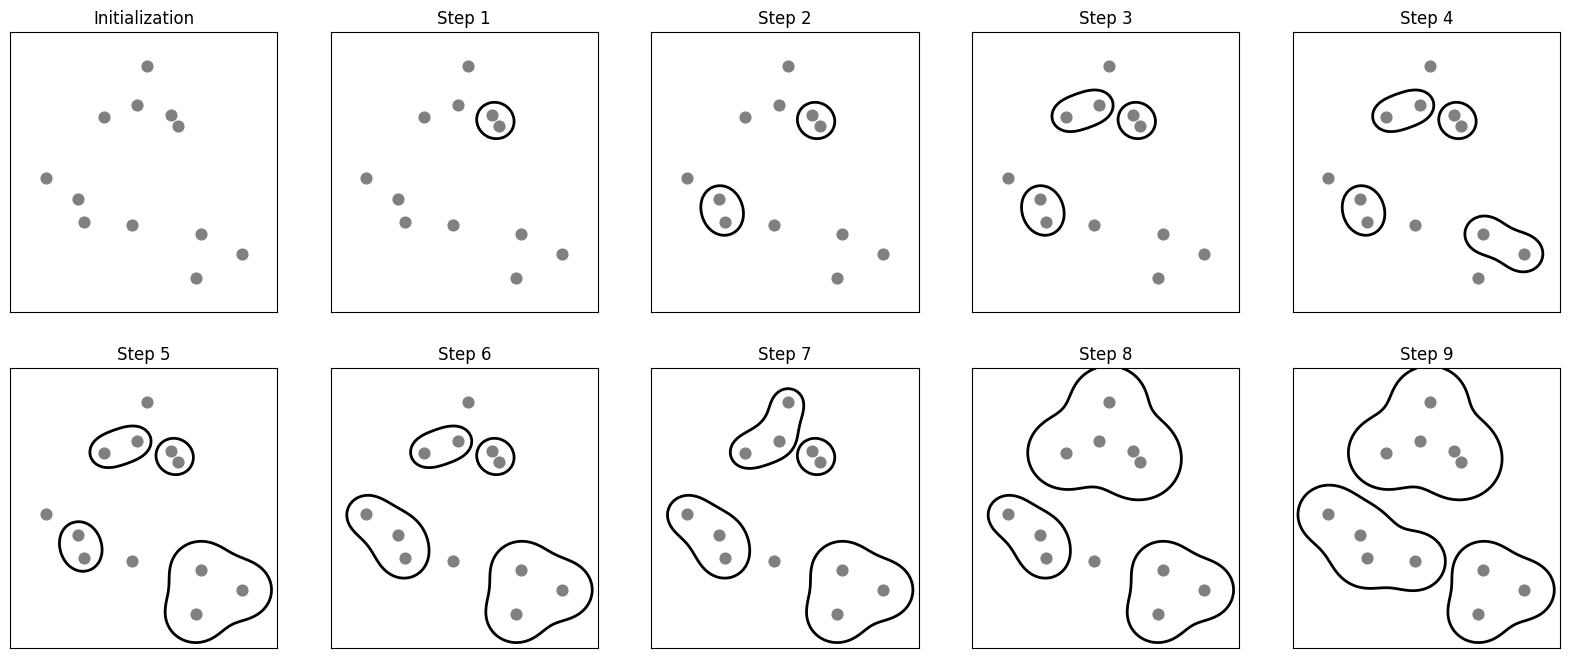

In [90]:
mglearn.plots.plot_agglomerative_algorithm()

Text(0, 0.5, 'Feature 1')

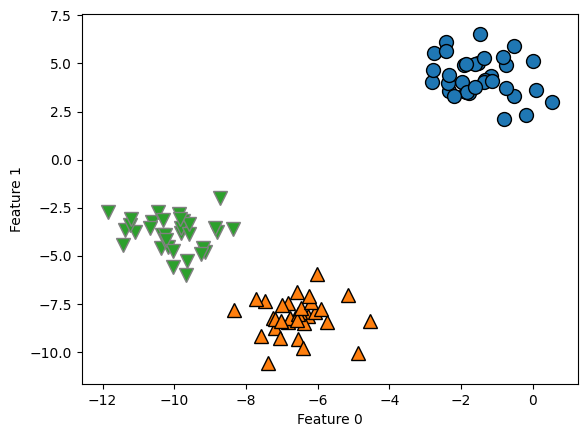

In [91]:
from sklearn.cluster import AgglomerativeClustering
X, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

## Hierarchical clustering and dendrograms

Agglomerative clustering produces what is known as a hierarchical clustering. The
clustering proceeds iteratively, and every point makes a journey from being a single
point cluster to belonging to some final cluster. Each intermediate step provides a
clustering of the data (with a different number of clusters). It is sometimes helpful to
look at all possible clusterings jointly. The next example (Figure 3-35) shows an over‐
lay of all the possible clusterings shown in Figure 3-33, providing some insight into
how each cluster breaks up into smaller clusters:

Text(0, 0.5, 'Cluster distance')

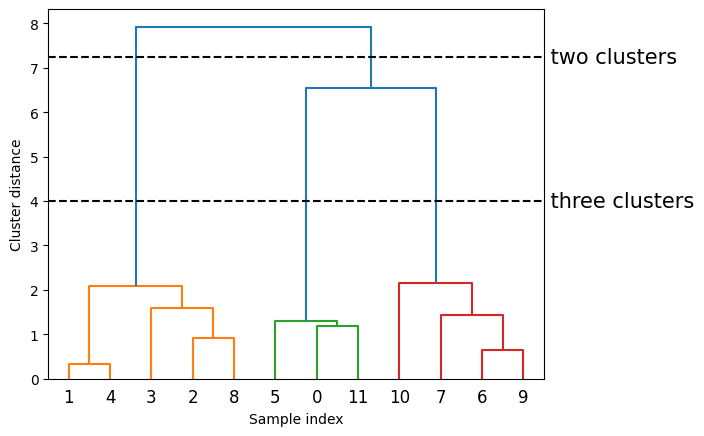

In [92]:
# Import the dendrogram function and the ward clustering function from SciPy
from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(random_state=0, n_samples=12)
# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)
# Mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")

## DBSCAN

- Another very useful clustering algorithm is DBSCAN (which stands for “densitybased spatial clustering of applications with noise”). The main benefits of DBSCAN
are that it does not require the user to set the number of clusters a priori, it can cap‐
ture clusters of complex shapes, and it can identify points that are not part of any
cluster. DBSCAN is somewhat slower than agglomerative clustering and k-means, but
still scales to relatively large datasets.

- DBSCAN works by identifying points that are in “crowded” regions of the feature
space, where many data points are close together. These regions are referred to as
dense regions in feature space. The idea behind DBSCAN is that clusters form dense
regions of data, separated by regions that are relatively empty.

- Points that are within a dense region are called core samples (or core points), and they
are defined as follows. There are two parameters in DBSCAN: min_samples and eps.
If there are at least min_samples many data points within a distance of eps to a given
data point, that data point is classified as a core sample. Core samples that are closer
to each other than the distance eps are put into the same cluster by DBSCAN.

In [93]:
from sklearn.cluster import DBSCAN
X, y = make_blobs(random_state=0, n_samples=12)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("Cluster memberships:\n{}".format(clusters))

Cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


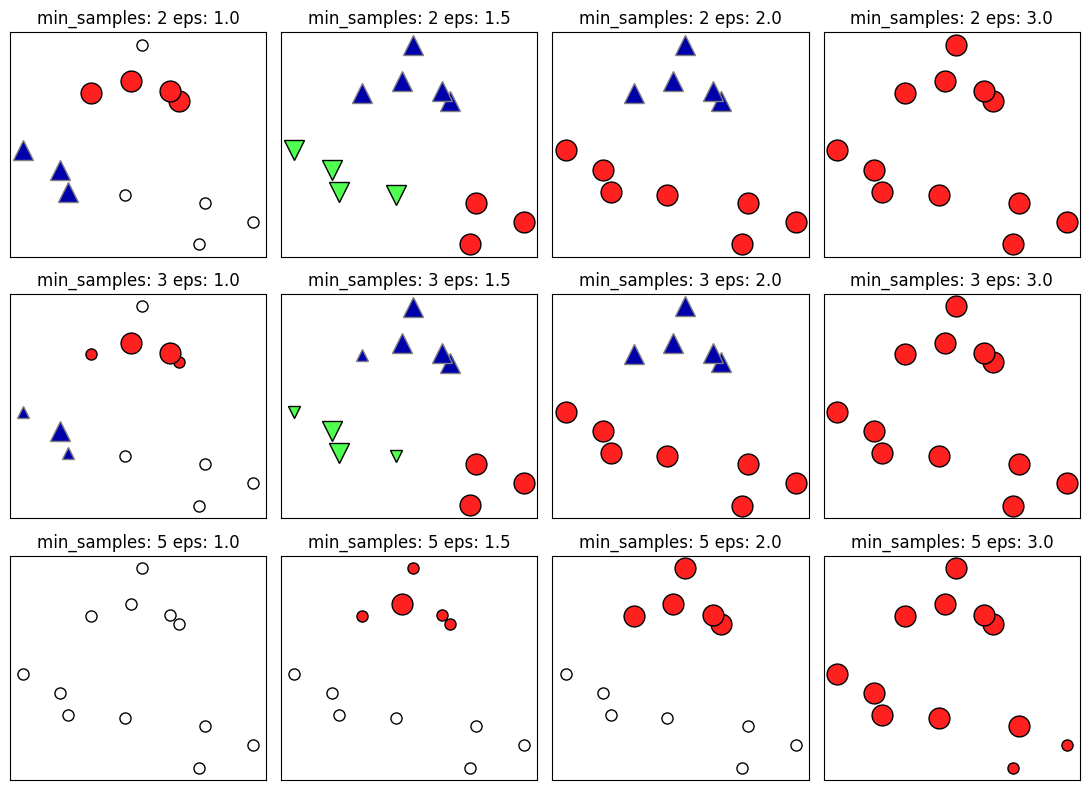

In [94]:
mglearn.plots.plot_dbscan()

Text(0, 0.5, 'Feature 1')

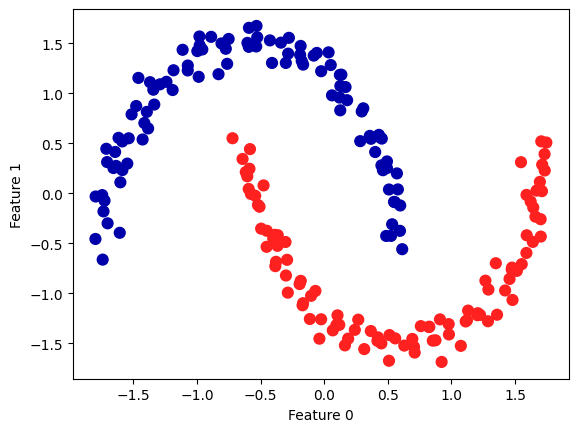

In [95]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


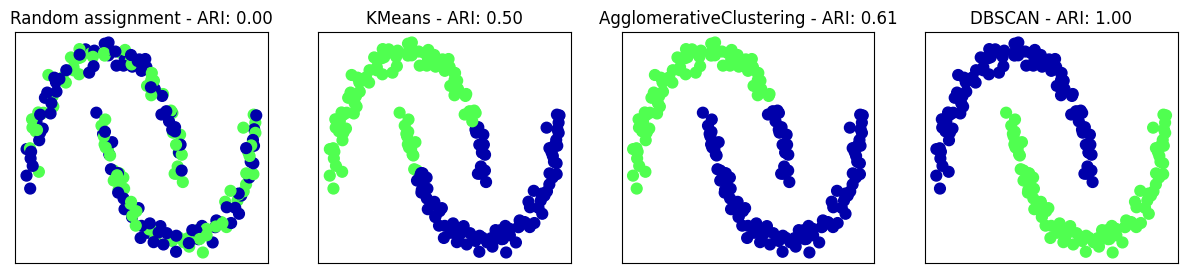

In [96]:
from sklearn.metrics.cluster import adjusted_rand_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
 subplot_kw={'xticks': (), 'yticks': ()})
# make a list of algorithms to use
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
 DBSCAN()]
# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
 cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment - ARI: {:.2f}".format(
 adjusted_rand_score(y, random_clusters)))
for ax, algorithm in zip(axes[1:], algorithms):
 # plot the cluster assignments and cluster centers
 clusters = algorithm.fit_predict(X_scaled)
 ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters,
 cmap=mglearn.cm3, s=60)
 ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__,
 adjusted_rand_score(y, clusters)))

In [97]:
from sklearn.metrics import accuracy_score
# these two labelings of points correspond to the same clustering
clusters1 = [0, 0, 1, 1, 0]
clusters2 = [1, 1, 0, 0, 1]
# accuracy is zero, as none of the labels are the same
print("Accuracy: {:.2f}".format(accuracy_score(clusters1, clusters2)))
# adjusted rand score is 1, as the clustering is exactly the same
print("ARI: {:.2f}".format(adjusted_rand_score(clusters1, clusters2)))

Accuracy: 0.00
ARI: 1.00


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


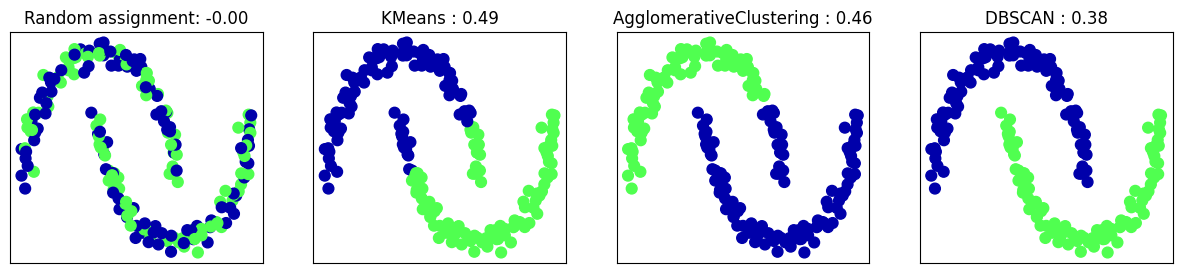

In [98]:
from sklearn.metrics.cluster import silhouette_score
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# rescale the data to zero mean and unit variance
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
fig, axes = plt.subplots(1, 4, figsize=(15, 3),
 subplot_kw={'xticks': (), 'yticks': ()})
# create a random cluster assignment for reference
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))
# plot random assignment
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters,
 cmap=mglearn.cm3, s=60)
axes[0].set_title("Random assignment: {:.2f}".format(
 silhouette_score(X_scaled, random_clusters)))
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2),
 DBSCAN()]
for ax, algorithm in zip(axes[1:], algorithms):
 clusters = algorithm.fit_predict(X_scaled)
 # plot the cluster assignments and cluster centers
 ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3,
 s=60)
 ax.set_title("{} : {:.2f}".format(algorithm.__class__.__name__,
 silhouette_score(X_scaled, clusters)))

In [99]:
# extract eigenfaces from lfw data and transform data
from sklearn.decomposition import PCA
pca = PCA(n_components=100, whiten=True, random_state=0)
pca.fit_transform(X_people)
X_pca = pca.transform(X_people)

In [100]:
# apply DBSCAN with default parameters
dbscan = DBSCAN()
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


In [101]:
dbscan = DBSCAN(min_samples=3)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))

Unique labels: [-1]


In [102]:
dbscan = DBSCAN(min_samples=3, eps=15)
labels = dbscan.fit_predict(X_pca)
print("Unique labels: {}".format(np.unique(labels)))


Unique labels: [-1  0]


In [103]:
# Count number of points in all clusters and noise.
# bincount doesn't allow negative numbers, so we need to add 1.
# The first number in the result corresponds to noise points.
print("Number of points per cluster: {}".format(np.bincount(labels + 1)))

Number of points per cluster: [  37 2026]


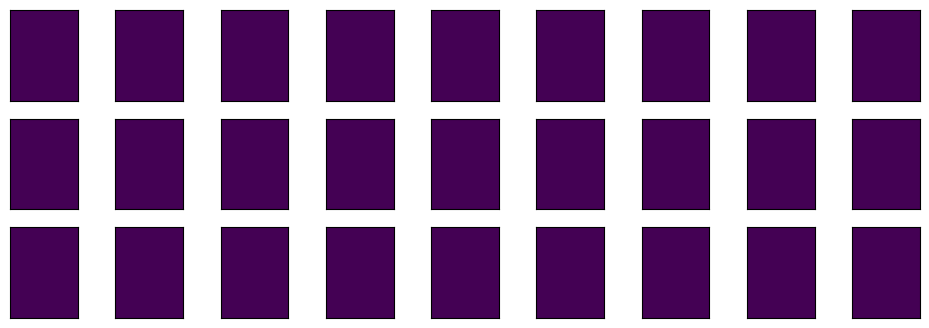

In [107]:
noise = X_people[labels==-1]
fig, axes = plt.subplots(3, 9, subplot_kw={'xticks': (), 'yticks': ()},
 figsize=(12, 4))
for image, ax in zip(noise, axes.ravel()):
 ax.imshow(image.reshape(image_shape), vmin=0, vmax=1)

In [ ]:
 # # # .........................